In [1]:
from torch.utils.data import DataLoader, Subset, random_split
from torchvision import datasets, transforms
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision

In [2]:
torch.manual_seed(265)
torch.set_default_dtype(torch.double)

1. Load, analyse and preprocess the CIFAR-10 dataset. Split it into 3 datasets: training, validation and test.
Take a subset of these datasets by keeping only 2 labels: bird and plane.

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
bird_plane_indices_train = [i for i in range(len(train_dataset)) if train_dataset.targets[i] in [0, 2]]
bird_plane_indices_test = [i for i in range(len(test_dataset)) if test_dataset.targets[i] in [0, 2]]

cifar2_train = Subset(train_dataset, bird_plane_indices_train)
cifar2_test = Subset(test_dataset, bird_plane_indices_test)

In [5]:
num_train_total = len(cifar2_train)
num_train = int(0.8 * num_train_total)
num_val = num_train_total - num_train

cifar2_train, cifar2_val = random_split(cifar2_train, [num_train, num_val])

In [6]:
len(cifar2_train), len(cifar2_val), len(cifar2_test)

(8000, 2000, 2000)

In [7]:
airplane_count_train = sum(label == 0 for _, label in cifar2_train)
bird_count_train = sum(label == 2 for _, label in cifar2_train)

airplane_count_val = sum(label == 0 for _, label in cifar2_val)
bird_count_val = sum(label == 2 for _, label in cifar2_val)

airplane_count_test = sum(label == 0 for _, label in cifar2_test)
bird_count_test = sum(label == 2 for _, label in cifar2_test)

print(f"Train: {airplane_count_train} Airplanes, {bird_count_train} Birds")
print(f"Validation: {airplane_count_val} Airplanes, {bird_count_val} Birds")
print(f"Test: {airplane_count_test} Airplanes, {bird_count_test} Birds")

Train: 3976 Airplanes, 4024 Birds
Validation: 1024 Airplanes, 976 Birds
Test: 1000 Airplanes, 1000 Birds


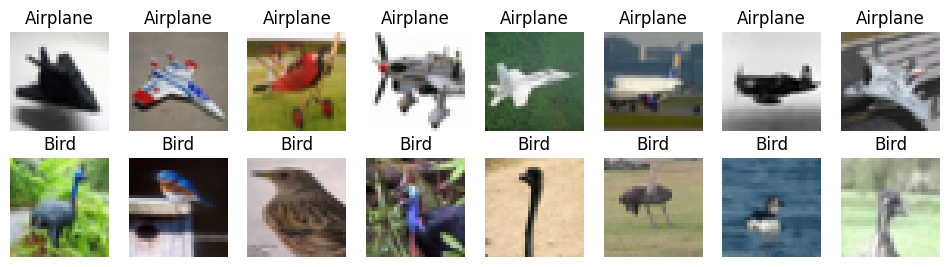

In [8]:
def show_imgs(imgs, titles, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 3))

    for i, (img, title) in enumerate(zip(imgs, titles)):
        img = img / 2 + 0.5
        npimg = img.numpy()
        row = i // cols
        col = i % cols
        axes[row, col].imshow(np.transpose(npimg, (1, 2, 0)))
        axes[row, col].set_title(title)
        axes[row, col].axis('off')

    plt.show()


airplane_indices = [i for i, (img, label) in enumerate(train_dataset) if label == 0][:8]
bird_indices = [i for i, (img, label) in enumerate(train_dataset) if label == 2][:8]

airplane_images = [train_dataset[i][0] for i in airplane_indices]
bird_images = [train_dataset[i][0] for i in bird_indices]

show_imgs(airplane_images + bird_images, ['Airplane'] * 8 + ['Bird'] * 8, rows=2, cols=8)

In [9]:
def set_device():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Training on device {device}.")
    return device

2. Write a `MyMLP` class that implements a MLP in PyTorch (so only fully connected layers) such that:
(a) The input dimension is 3072 (= 32 $\times$ 32 $\times$ 3) and the output dimension is 2 (for the 2 classes).
(b) The hidden layers have respectively 512, 128 and 32 hidden units.
(c) All activation functions are `ReLU`. The last layer has no activation function since the
cross-entropy loss already includes a softmax activation function.

In [10]:
class MyMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 32)
        self.fc4 = nn.Linear(32, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


my_mlp = MyMLP()

3. Write a `train(n_epochs, optimizer, model, loss_fn, train_loader)` function that trains model for `n_epochs`
epochs given an optimizer `optimizer`, a loss function `loss_fn` and a dataloader `train_loader`.

In [11]:
def train(n_epochs, optimizer, model, loss_fn, train_loader):
    pass

In [12]:
def train_manual_update(n_epochs, lr, model, loss_fn, train_loader):
    pass

In [13]:
batch_size = 256

train_loader = DataLoader(cifar2_train, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(cifar2_val, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(cifar2_test, batch_size=batch_size, shuffle=False)

In [14]:
n_epochs = 30
lr = [0.01]
mom = [0, 0.8, 0.9]
decay = [0, 0.01, 0.001]

optimizer = optim.SGD(my_mlp.parameters(), lr=0.01, momentum=0, weight_decay=0)
loss_fn = nn.CrossEntropyLoss()

In [15]:
device = set_device()

Training on device cpu.
